Keir Shaffick-Richardson 12/12/24

# Keir Shaffick-Richardson
# /01/25

## Example Dashboard

### Curve with error band

This example illustrates how to draw an error band around a parametrized curve.

A parametrized curve x(t), y(t) can directly be drawn using plot.

[None]

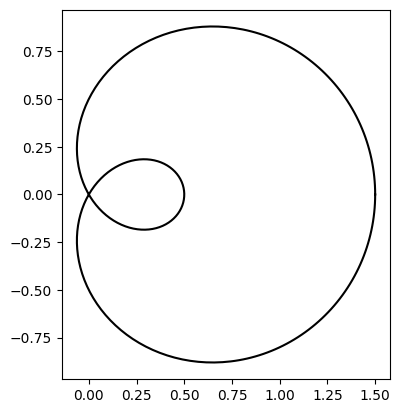

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import PathPatch
from matplotlib.path import Path

N = 400
t = np.linspace(0, 2 * np.pi, N)
r = 0.5 + np.cos(t)
x, y = r * np.cos(t), r * np.sin(t)

fig, ax = plt.subplots()
ax.plot(x, y, "k")
ax.set(aspect=1)


### Mapping marker properties to multivariate data
This example shows how to use different properties of markers to plot multivariate datasets. Here we represent a successful baseball throw as a smiley face with marker size mapped to the skill of thrower, marker rotation to the take-off angle, and thrust to the marker color.

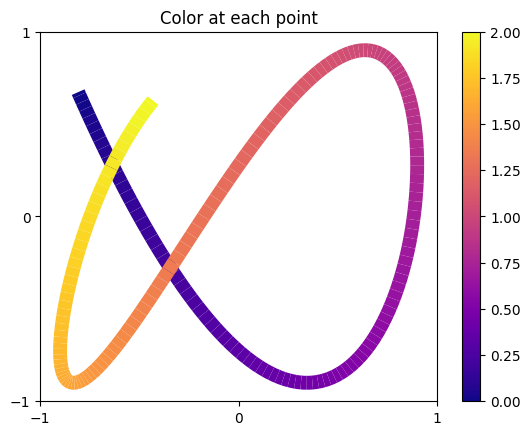

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import Normalize
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D

SUCCESS_SYMBOLS = [
    TextPath((0, 0), "☹"),
    TextPath((0, 0), "😒"),
    TextPath((0, 0), "☺"),
]

N = 25
np.random.seed(42)
skills = np.random.uniform(5, 80, size=N) * 0.1 + 5
takeoff_angles = np.random.normal(0, 90, N)
thrusts = np.random.uniform(size=N)
successful = np.random.randint(0, 3, size=N)
positions = np.random.normal(size=(N, 2)) * 5
data = zip(skills, takeoff_angles, thrusts, successful, positions)

cmap = plt.colormaps["plasma"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for skill, takeoff, thrust, mood, pos in data:
    t = Affine2D().scale(skill).rotate_deg(takeoff)
    m = MarkerStyle(SUCCESS_SYMBOLS[mood], transform=t)
    ax.plot(pos[0], pos[1], marker=m, color=cmap(thrust))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 1), cmap=cmap),
             ax=ax, label="Normalized Thrust [a.u.]")
ax.set_xlabel("X position [m]")
ax.set_ylabel("Y position [m]")

plt.show()


### Filled polygon

`fill()` draws a filled polygon based on lists of point coordinates x, y.

This example uses the Koch snowflake as an example polygon.

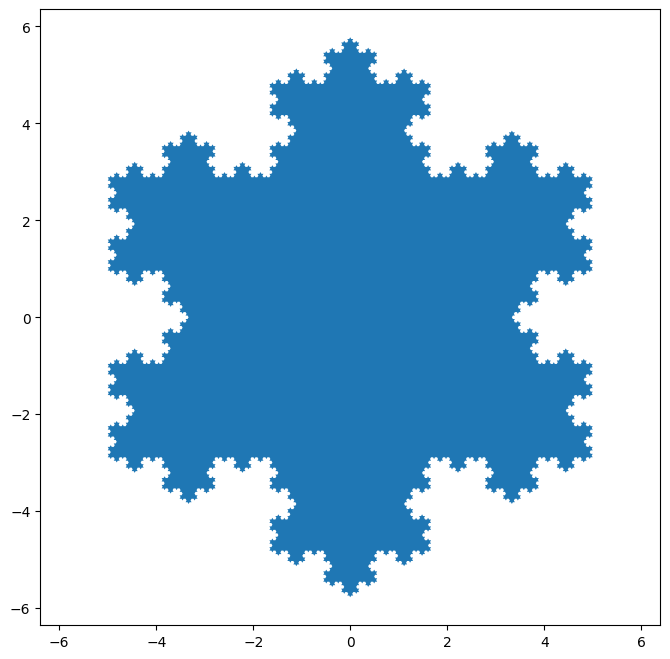

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()


https://mybinder.org/v2/gh/Kidziller/my-first-binder/HEAD?labpath=%2Fvoila%2Frender%2Fdashboard-test.ipynb